## Cuaderno para generar datos 


In [82]:
# 17/5/24
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit,least_squares

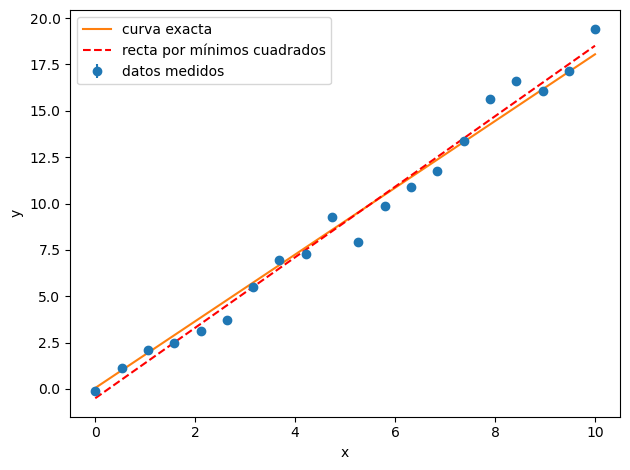

In [83]:
# Vamos a generar un conjunto de datos ficticios para 
# luego hacer una aproximación por mínimos cuadradosamos los datos 
# En el eje x, 20 valores equiespaciados entre 0 y 10
# Definir los parámetros del modelo
m = 1.8  # Pendiente
b = 0.05  # Término independiente
# Generar datos ficticios
x_datos = np.linspace(0, 10, 20)
x_datos = np.around(x_datos, decimals=2)  # Redondear a dos decimales
y_exacto = m*x_datos + b
# Introducimos un poco de ruido 
np.random.seed(950)
y_ruido = 0.8*np.random.normal(size=x_datos.size)
y_datos = y_exacto + y_ruido
# Calcular incertidumbre (en este caso, usando un valor fijo para la simplicidad)
incertidumbre_y = 0.01  # Se ajusta este valor según tus necesidades
# Graficar los datos con barras de error
plt.figure()
plt.errorbar(x_datos, y_datos, yerr=incertidumbre_y, fmt='o', label='datos medidos')
# Graficar la curva exacta
plt.plot(x_datos, y_exacto, '-', label='curva exacta')

# Ajustar la recta por mínimos cuadrados
A = np.vstack([x_datos, np.ones(len(x_datos))]).T
m_cua, b_cua = np.linalg.lstsq(A, y_datos, rcond=None)[0]

# Graficar la recta por mínimos cuadrados
plt.plot(x_datos, m_cua * x_datos + b_cua, 'r--', label='recta por mínimos cuadrados')

# Añadir leyenda y etiquetas de ejes
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

# Ajustar el diseño del gráfico
plt.tight_layout()
# Guardar la figura (si se desea)
# plt.savefig('datos-con-incertidumbre.png', dpi=150)
# Mostrar la gráfica
plt.show()

In [84]:
# Calcular los errores estándar de los coeficientes
residuals = y_datos - (m_cua * x_datos + b_cua)
mse = np.sum(residuals ** 2) / (len(x_datos) - 2)  # Error cuadrático medio
variance = np.var(x_datos, ddof=1)  # Varianza de x_datos
m_error = np.sqrt(mse / np.sum((x_datos - np.mean(x_datos)) ** 2))
b_error = np.sqrt(mse * (1 / len(x_datos) + np.mean(x_datos) ** 2 / np.sum((x_datos - np.mean(x_datos)) ** 2)))

#print("Error en la pendiente:", m_error)
#print("Error en el término independiente:", b_error)
print(f'm = {np.round(m_cua, 1)} \u00B1 {np.round(m_error, 1)}')
print(f'b = {np.round(b_cua, 1)} \u00B1 {np.round(b_error, 1)}')

m = 1.9 ± 0.1
b = -0.5 ± 0.3


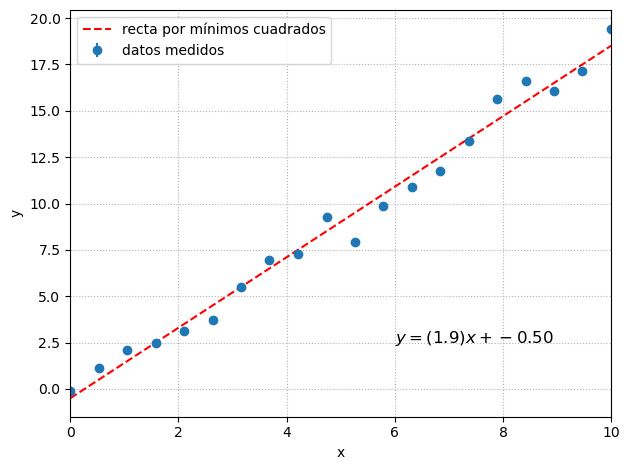

m = 1.9 ± 0.0
b = -0.5 ± 0.0


In [96]:
# Datos
xn= x_datos
yn= y_datos
# Cálculos intermedios
n = len(xn)
Sum_x = np.sum(xn)
Sum_y = np.sum(yn)
Sum_xx = np.sum(xn**2)
Sum_xy = np.sum(xn*yn)
Delta = n * np.sum(xn**2) - np.sum(xn)**2

# Coeficientes de la recta de mejor ajuste
b_mc = (Sum_xx * Sum_y - Sum_xy * Sum_x) / Delta
m_mc = (n * Sum_xy - Sum_x * Sum_y) / Delta

# Gráfica de los datos y la recta ajustada
x = xn
y = m_mc * x + b_mc

plt.errorbar(x_datos, y_datos, yerr=incertidumbre_y, fmt='o', label='datos medidos')
plt.plot(x, y, 'r--', label='recta por mínimos cuadrados')
plt.grid(linestyle='dotted')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 10)
plt.text(6.0, 2.5, r'$y = ({:.1f})x + {:.2f}$'.format(m_mc, b_mc), fontsize=12)
plt.tight_layout()
plt.show()

# Cálculo de los errores estándar
Sum_d = np.sum(yn - (b_mc + m_mc * xn))
Sy = np.sqrt(np.abs(Sum_d) / (n - 2))
Dm = np.sqrt(n / Delta)*Sy
Db = np.sqrt(Sum_xx / Delta)*Sy

print(f'm = {np.round(m_mc, 1)} \u00B1 {np.round(Dm, 4)}')
print(f'b = {np.round(b_mc, 1)} \u00B1 {np.round(Db, 1)}')

In [86]:
Dm, Db, Sum_d

(1.3695955751505931e-09, 8.01030192473515e-09, -6.217248937900877e-15)

In [97]:
m_error, b_error

(0.05525261496397059, 0.3231538828123616)

In [87]:
x_datos

array([ 0.  ,  0.53,  1.05,  1.58,  2.11,  2.63,  3.16,  3.68,  4.21,
        4.74,  5.26,  5.79,  6.32,  6.84,  7.37,  7.89,  8.42,  8.95,
        9.47, 10.  ])

In [88]:
y_datos

array([-0.10314705,  1.13734084,  2.09477831,  2.49651609,  3.12337028,
        3.69045394,  5.50200992,  6.9485361 ,  7.27351556,  9.2486353 ,
        7.94018813,  9.85238545, 10.88533039, 11.74438237, 13.36207595,
       15.63877445, 16.62912741, 16.06896082, 17.12994292, 19.43199961])

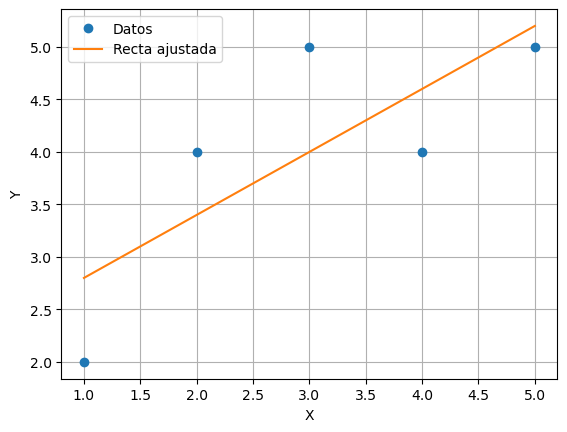

Ecuación de la recta:
y = 0.600x + 2.200
Error estándar de la estimación (RMSE): 0.8944271909999157
Intervalo de confianza al 95% para la pendiente: 0.332885684761615 - 0.8671143152366403


In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Ajuste de la recta por mínimos cuadrados
from scipy.optimize import curve_fit

def func_recta(x, m, b):
  return m * x + b

m, b = curve_fit(func_recta, x, y)[0]

# Cálculo del error estándar de la estimación (RMSE)
y_hat = func_recta(x, m, b)
residuo = y - y_hat
rmse = np.sqrt(np.sum(residuo**2) / (len(x) - 2))

# Cálculo de los intervalos de confianza al 95%
sigma = np.sqrt(np.sum(residuo**2) / (len(x) - 2))
t_student = np.abs(np.quantile(np.random.standard_normal(len(x) - 2), 0.975))
intervalo_inf = m - t_student * sigma / np.sqrt(np.sum((x - np.mean(x))**2))
intervalo_sup = m + t_student * sigma / np.sqrt(np.sum((x - np.mean(x))**2))

# Gráfica de los datos y la recta ajustada
plt.plot(x, y, 'o', label='Datos')
plt.plot(x, func_recta(x, m, b), label='Recta ajustada')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Impresión de los resultados
print("Ecuación de la recta:")
print(f"y = {m:.3f}x + {b:.3f}")
print("Error estándar de la estimación (RMSE):", rmse)
print("Intervalo de confianza al 95% para la pendiente:", intervalo_inf, "-", intervalo_sup)


In [101]:
# Cálculo de los errores absolutos de m y b
sigma_m = np.sqrt(sigma**2 / (np.sum((x - np.mean(x))**2)))
sigma_b = sigma * np.sqrt(1 / np.sum((x - np.mean(x))**2))

# Impresión de los resultados
print("Error absoluto estimado de la pendiente (m):", sigma_m)
print("Error absoluto estimado de la intersección en y (b):", sigma_b)


Error absoluto estimado de la pendiente (m): 0.28284271247461895
Error absoluto estimado de la intersección en y (b): 0.28284271247461895
